In [1]:
import pandas as pd

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# to make notebook wider for screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Modelo Iniciacion

## Pipeline to deploy with multi core vCPU capabilities

### For debugging or running complete pipeline

#### Train Model

In [1]:
from randomForest_classifier.train_pipeline import run_training

In [2]:
%%time
# this function runs run_training from the pipeline to deploy
# for debugging, modify file: __init__.py  and set level of debugging to debug: logger.setLevel(logging.DEBUG)
# if model has been trained previously, it won't fit the feature generation iteractions, instead it will retrieve it from trained model
# delete .pkl in order to retrain, or change VERSION number

if(True):
    run_training()

(50353, 69) (5595, 69)
2021-04-06 22:12:54,309 — randomForest_classifier.processing.preprocessors — DEBUG —transform:88 — DictionaryImputer Time: 0.027321577072143555
2021-04-06 22:12:54,356 — randomForest_classifier.processing.preprocessors — DEBUG —transform:34 — CategoricalImputer Time: 0.04573941230773926
2021-04-06 22:12:54,378 — randomForest_classifier.processing.preprocessors — DEBUG —transform:60 — NumericalImputer Time: 0.011307477951049805
2021-04-06 22:12:54,438 — randomForest_classifier.processing.preprocessors — DEBUG —transform:141 — YearsVariableEstimator Time: 0.05582118034362793
2021-04-06 22:12:54,820 — randomForest_classifier.processing.preprocessors — DEBUG —transform:175 — RareLabelCategoricalEncoder Time: 0.12581610679626465
2021-04-06 22:12:55,493 — randomForest_classifier.processing.preprocessors — DEBUG —transform:218 — CategoricalEncoder Time: 0.434650182723999
(50353, 69)
2021-04-06 22:12:55,515 — randomForest_classifier.processing.preprocessors — DEBUG —tran

#### Test

In [3]:
from randomForest_classifier.predict import make_transform
from randomForest_classifier.processing.data_management import load_dataset
import pandas as pd

In [13]:
def test_make_single_prediction():
    # Given
    test_data = load_dataset(file_name='test.csv')
    single_test_input = test_data[0:1]

    # When
    subject = make_transform(input_data=single_test_input)
    #subject['transform'] = pd.DataFrame(subject['transform'], columns = test_data.columns.to_list())

    return subject

def test_make_multiple_predictions():
    # Given
    test_data = load_dataset(file_name='dataset.csv')
    original_data_length = len(test_data)
    multiple_test_input = test_data.copy()

    # When
    subject = make_transform(input_data=multiple_test_input)
    #subject['transform'] = pd.DataFrame(subject['transform'], columns = test_data.columns.to_list())

    return subject


In [14]:
t = test_make_single_prediction()

2021-04-06 22:14:23,213 — randomForest_classifier.processing.preprocessors — DEBUG —transform:88 — DictionaryImputer Time: 0.0016024112701416016
2021-04-06 22:14:23,218 — randomForest_classifier.processing.preprocessors — DEBUG —transform:34 — CategoricalImputer Time: 0.003817319869995117
2021-04-06 22:14:23,221 — randomForest_classifier.processing.preprocessors — DEBUG —transform:60 — NumericalImputer Time: 0.0020029544830322266
2021-04-06 22:14:23,224 — randomForest_classifier.processing.preprocessors — DEBUG —transform:141 — YearsVariableEstimator Time: 0.003118276596069336
2021-04-06 22:14:23,243 — randomForest_classifier.processing.preprocessors — DEBUG —transform:175 — RareLabelCategoricalEncoder Time: 0.018296480178833008
2021-04-06 22:14:23,296 — randomForest_classifier.processing.preprocessors — DEBUG —transform:218 — CategoricalEncoder Time: 0.05178046226501465
(1, 69)
2021-04-06 22:14:23,300 — randomForest_classifier.processing.preprocessors — DEBUG —transform:235 — DropUnec

In [15]:
t['transform']

,numero_cuotas,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,cl_unq_act_act_fechasolicitud_date,cl_unq_act_act_monto,...,cl_unq_act_act_flagtienesecadora,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo,cl_unq_act_act_fnacimiento_date
0,0.176471,0.181818,0.0,1.0,0.121038,...,0.5,1.0,1.0,1.0,0.0


In [16]:
tt = test_make_multiple_predictions()

2021-04-06 22:14:27,082 — randomForest_classifier.processing.preprocessors — DEBUG —transform:88 — DictionaryImputer Time: 0.029584169387817383
2021-04-06 22:14:27,134 — randomForest_classifier.processing.preprocessors — DEBUG —transform:34 — CategoricalImputer Time: 0.05198955535888672
2021-04-06 22:14:27,153 — randomForest_classifier.processing.preprocessors — DEBUG —transform:60 — NumericalImputer Time: 0.012096405029296875
2021-04-06 22:14:27,214 — randomForest_classifier.processing.preprocessors — DEBUG —transform:141 — YearsVariableEstimator Time: 0.05449676513671875
2021-04-06 22:14:27,369 — randomForest_classifier.processing.preprocessors — DEBUG —transform:175 — RareLabelCategoricalEncoder Time: 0.14946341514587402
2021-04-06 22:14:27,934 — randomForest_classifier.processing.preprocessors — DEBUG —transform:218 — CategoricalEncoder Time: 0.5590202808380127
(55948, 69)
2021-04-06 22:14:27,963 — randomForest_classifier.processing.preprocessors — DEBUG —transform:235 — DropUneces

In [32]:
dataset = pd.concat([tt['transform'], tt['target']], axis = 1)

In [33]:
dataset.head()

,numero_cuotas,cl_unq_act_act_messolicitud,cl_unq_act_act_trimestresolicitud,cl_unq_act_act_fechasolicitud_date,cl_unq_act_act_monto,...,cl_unq_act_act_flagtienehorno,cl_unq_act_act_flagtienemicroondas,cl_unq_act_act_flagtienestereo,cl_unq_act_act_fnacimiento_date,maxmora
0,0.058824,0.909091,1.000000,1.0,0.241714,...,0.5,0.5,1.0,0.000000,1
1,0.176471,0.090909,0.000000,1.0,0.198594,...,1.0,1.0,1.0,0.607843,1
2,0.294118,0.545455,0.666667,1.0,0.121038,...,0.5,0.5,0.5,0.000000,0
3,0.088235,1.000000,1.000000,1.0,0.741482,...,0.5,0.5,1.0,0.745098,1
4,0.323529,0.636364,0.666667,1.0,0.136549,...,1.0,0.5,1.0,0.568627,1


In [10]:
print("Columns with Missing:")
for col in dataset.columns.to_list():
    if(dataset[dataset[col] == "Missing"][col].shape[0] != 0):
        print('\t',col)

Columns with Missing:


#### GridSearch and Refit

In [5]:
from xgb_classifier.gridSearch_and_fit import run_gridSearch_and_fit

In [6]:
%%time
if(True):
    run_gridSearch_and_fit(limit_number_of_rows = None)

2021-03-18 00:12:27,443 — xgb_classifier.processing.preprocessors — DEBUG —transform:53 — NumericallCasterFromString Time: 0.00869607925415039
2021-03-18 00:12:27,456 — xgb_classifier.processing.preprocessors — DEBUG —transform:92 — DateCasterFromString Time: 0.012336492538452148
2021-03-18 00:12:27,477 — xgb_classifier.processing.preprocessors — DEBUG —transform:134 — DataTypeCaster Time: 0.013808488845825195
2021-03-18 00:12:27,494 — xgb_classifier.processing.preprocessors — DEBUG —transform:159 — ModifiedVariablesChanger ('cl_unq_act_act_estadocivil', 'cl_unq_act_act_estadocivilmodificado')
2021-03-18 00:12:27,498 — xgb_classifier.processing.preprocessors — DEBUG —transform:161 — ModifiedVariablesChanger {'feature_modified': 'cl_unq_act_act_estadocivilmodificado'}
2021-03-18 00:12:27,528 — xgb_classifier.processing.preprocessors — DEBUG —transform:159 — ModifiedVariablesChanger ('cl_unq_act_act_profesion', 'cl_unq_act_act_profesionmodificada')
2021-03-18 00:12:27,531 — xgb_classifie

/usr/local/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


2021-03-18 01:54:43,402 — xgb_classifier.processing.preprocessors — DEBUG —fit:41 — NumericallCasterFromString Time: 3.2712574005126953
2021-03-18 01:54:43,412 — xgb_classifier.processing.preprocessors — DEBUG —transform:53 — NumericallCasterFromString Time: 0.008701324462890625
2021-03-18 01:54:46,827 — xgb_classifier.processing.preprocessors — DEBUG —fit:82 — DateCasterFromString Time: 3.4142282009124756
2021-03-18 01:54:46,836 — xgb_classifier.processing.preprocessors — DEBUG —transform:92 — DateCasterFromString Time: 0.008537769317626953
2021-03-18 01:54:47,076 — xgb_classifier.processing.preprocessors — DEBUG —fit:118 — DataTypeCaster Time: 0.23258757591247559
2021-03-18 01:54:47,098 — xgb_classifier.processing.preprocessors — DEBUG —transform:134 — DataTypeCaster Time: 0.013518810272216797
2021-03-18 01:54:47,114 — xgb_classifier.processing.preprocessors — DEBUG —transform:159 — ModifiedVariablesChanger ('cl_unq_act_act_estadocivil', 'cl_unq_act_act_estadocivilmodificado')
2021-0

#### Display Stats

In [1]:
from xgb_classifier.processing.scoring import model_stats, model_stats_plain

2021-03-25 21:31:11,915 — xgb_classifier.processing.preprocessors — DEBUG —transform:64 — NumericallCasterFromString Time: 0.0010383129119873047
2021-03-25 21:31:11,917 — xgb_classifier.processing.preprocessors — DEBUG —transform:119 — DateCasterFromString Time: 0.0011272430419921875
2021-03-25 21:31:12,183 — xgb_classifier.processing.preprocessors — DEBUG —transform:168 — DataTypeCaster Time: 0.2647249698638916
2021-03-25 21:31:12,197 — xgb_classifier.processing.preprocessors — DEBUG —transform:209 — ModifiedVariablesChanger Time: 0.012531757354736328
2021-03-25 21:31:12,227 — xgb_classifier.processing.preprocessors — DEBUG —transform:243 — CategoricalImputer Time: 0.029256105422973633
2021-03-25 21:31:12,233 — xgb_classifier.processing.preprocessors — DEBUG —transform:280 — DictionaryImputer Time: 0.003711223602294922
2021-03-25 21:31:12,267 — xgb_classifier.processing.preprocessors — DEBUG —transform:350 — SimilarityValueMapper Time: 0.03255772590637207
2021-03-25 21:31:12,305 — xgb

/home/docker/data/cch-iniciacion/ds-cch-iniciacion/deploy/packages/xgb_classifier/xgb_classifier/processing/scoring.py:55: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
/home/docker/data/cch-iniciacion/ds-cch-iniciacion/deploy/packages/xgb_classifier/xgb_classifier/processing/scoring.py:63: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


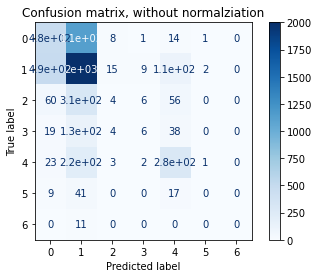

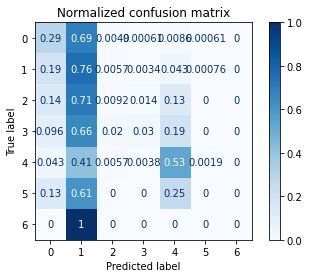

In [2]:
%%time
scores, cm = model_stats(model = None, limit_number_of_rows = None)

In [3]:
scores, cm = model_stats_plain(model=None)

2021-03-25 21:31:15,599 — xgb_classifier.processing.preprocessors — DEBUG —transform:64 — NumericallCasterFromString Time: 0.0008788108825683594
2021-03-25 21:31:15,601 — xgb_classifier.processing.preprocessors — DEBUG —transform:119 — DateCasterFromString Time: 0.0012080669403076172
2021-03-25 21:31:15,860 — xgb_classifier.processing.preprocessors — DEBUG —transform:168 — DataTypeCaster Time: 0.2574894428253174
2021-03-25 21:31:15,874 — xgb_classifier.processing.preprocessors — DEBUG —transform:209 — ModifiedVariablesChanger Time: 0.01308131217956543
2021-03-25 21:31:15,903 — xgb_classifier.processing.preprocessors — DEBUG —transform:243 — CategoricalImputer Time: 0.0282289981842041
2021-03-25 21:31:15,909 — xgb_classifier.processing.preprocessors — DEBUG —transform:280 — DictionaryImputer Time: 0.003742218017578125
2021-03-25 21:31:15,943 — xgb_classifier.processing.preprocessors — DEBUG —transform:350 — SimilarityValueMapper Time: 0.03193497657775879
2021-03-25 21:31:15,980 — xgb_cl

/home/docker/data/cch-iniciacion/ds-cch-iniciacion/deploy/packages/xgb_classifier/xgb_classifier/processing/scoring.py:138: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
/home/docker/data/cch-iniciacion/ds-cch-iniciacion/deploy/packages/xgb_classifier/xgb_classifier/processing/scoring.py:146: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


## Display best params from GridSearch

In [1]:
from xgb_classifier.processing.data_management import load_params
from xgb_classifier.config import config
from xgb_classifier import __version__ as _version

In [2]:
load_params(file_name = f"{config.BEST_PARAMS_SAVE_FILE}_{_version}.csv")

2021-03-25 14:47:50,026 — xgb_classifier.processing.data_management — INFO —load_params:57 — best parameters from grid search: {'max_depth': 8, 'min_child_weight': 4}


{'max_depth': 8, 'min_child_weight': 4}